# Importando bibliotecas

In [358]:
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
ion()

# Definindo modelo 

In [359]:
def matriaquia(y, t, r1, r2, lambd, beta, alpha, k, dI, dN, dM):

    I = y[0]
    N = y[1]
    M = y[2]

    dIdt = r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * (1 - (I+N+M) / k) - dI * I
    dNdt = r2 * ( (M*N) / (M+ ( (1/alpha) * (I+N) ) ) ) * r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * beta * (1 - (I+N+M) / k) - dN * N
    dMdt = r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * lambd * (1 - (I+N+M) / k) + r2 * ( (M*N) / (M+ (1/alpha) * (I+N) ) ) * (1 - (I+N+M) / k) - dM*M

    return [dIdt, dNdt, dMdt]

#  Parametros

In [360]:
r1 = 2
r2 = 1

lambd = 0.1
beta = 0.05

alpha = 4
k = 300.

dI = .25
dN = .35
dM = dN

# Condicoes iniciais

In [361]:
numero_de_femeas_infectadas = 1
numero_de_femeas_saudaveis = 100.
numero_de_machos = 100.

condicoes_iniciais = [numero_de_femeas_infectadas, numero_de_femeas_saudaveis, numero_de_machos]

# Chamando Modelo

In [362]:
tempo = arange(0, 50, 1)
params = (r1, r2, lambd, beta, alpha, k, dI, dN, dM)
resultados = odeint(matriaquia, condicoes_iniciais, tempo, params)

# Plotando graficos

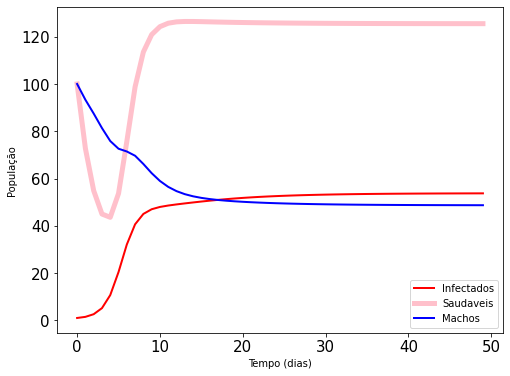

In [363]:
t = arange(0, 73)

params = (r1, r2, lambd, beta, alpha, k, dI, dN, dM)

numero_de_femeas_infectadas = 50
numero_de_femeas_saudaveis = 100.
numero_de_machos = 100.

condicoes_iniciais = [numero_de_femeas_infectadas, numero_de_femeas_saudaveis, numero_de_machos]

y = odeint(matriaquia, condicoes_iniciais, t, params)

figure(figsize=(8, 6)) 
#  get all items from the first column
x = y[:, 0]
#  get all items from the second column
a = y[:, 1]

z = y[:, 2]

plot(tempo, resultados[:, 0], color='red',zorder=1, linewidth=2, label='Infectados')
plot(tempo, resultados[:, 1], color='pink',zorder=1, linewidth=5, label='Saudaveis')
plot(tempo, resultados[:, 2], color='b',zorder=1, linewidth=2, label='Machos')
tick_params(labelsize= 15)

xlabel('Tempo (dias)')
ylabel('População')

legend()


[8.749043175490343,
 8.749638758485263,
 9.419916095053797,
 33.969966323757376,
 44.21880722581402,
 48.68135914165555,
 51.30417526953589,
 53.05332892532097,
 54.30920881962418,
 55.25681794508974,
 55.99810264877315,
 56.594207612535584,
 57.0841511987707,
 57.49405534215668,
 57.84209098383844,
 58.14129682631507,
 58.40127634233178,
 58.629266533924245,
 58.83082212896194,
 59.01028044184028,
 59.17107738416045,
 59.315970522754824,
 59.44719962371384,
 59.56660177708467,
 59.6756984610612,
 59.77576122860152,
 59.86785944450947,
 59.95290300852807,
 60.03166349155187,
 60.10480952364256,
 60.172912431893046,
 60.23647212553264,
 60.29592328169713,
 60.35164809954641,
 60.40398101930601,
 60.453218468809936,
 60.49962358223619,
 60.54343049207969,
 60.58484751828131,
 60.62406146298265,
 60.66124182767015,
 60.69653827072846,
 60.73008808197141,
 60.76201591427059,
 60.792432639360364,
 60.82144179816935,
 60.84913626322198,
 60.87560083984381,
 60.900914369621546,
 60.9251474326

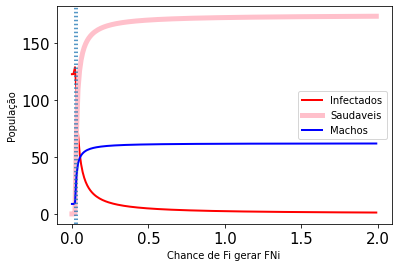

In [364]:
femeas_infectadas = []
femeas_nao_infectadas = []
machos = []

KK = arange(0, 2, .01)

for i in KK:
    params = (r1, r2, lambd, i, alpha, k, dI, dN, dM)

    y = odeint(matriaquia, condicoes_iniciais, tempo, params)
    
    femeas_infectadas.append(y[:, 0][-1])
    femeas_nao_infectadas.append(y[:, 1][-1])
    machos.append(y[:, 2][-1])

plot(KK, femeas_infectadas, color='red',zorder=1, linewidth=2, label='Infectados')
plot(KK, femeas_nao_infectadas, color='pink',zorder=1, linewidth=5, label='Saudaveis')
plot(KK, machos, color='b',zorder=1, linewidth=2, label='Machos')
tick_params(labelsize= 15)

xlabel('Chance de Fi gerar FNi')
ylabel('População')
axvline(0.021, 0, 1, ls=':')
axvline(0.035, 0, 1, ls=':')
legend()

machos
